# Import Packages

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analysis

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("T1.csv")

In [4]:
print('How many observations do we have?')
print(data.count())
print('----------------')
print(data.columns)

How many observations do we have?
Date/Time                        50530
LV ActivePower (kW)              50530
Wind Speed (m/s)                 50530
Theoretical_Power_Curve (KWh)    50530
Wind Direction (°)               50530
dtype: int64
----------------
Index(['Date/Time', 'LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)'],
      dtype='object')


In [5]:
data['Date/Time']=pd.to_datetime(data['Date/Time'],format='%d %m %Y %H:%M')
data['Week']=data['Date/Time'].dt.day // 7 + 1

data['Week'].value_counts()

Week
3    11948
4    11809
2    11645
1     9924
5     5204
Name: count, dtype: int64

### Extracting Seasons, month, hour and Day

In [6]:
data['Month']=data['Date/Time'].dt.month
seasons_dict = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'}
data['Seasons'] = data['Month'].map(seasons_dict)
data['Day']=data['Date/Time'].dt.day
data['Hour']=data['Date/Time'].dt.hour
##data.drop(columns=['Date/Time'],inplace=True)

In [7]:
data.head(2)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Week,Month,Seasons,Day,Hour
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,1,1,Winter,1,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,1,1,Winter,1,0


In [8]:
data.shape

(50530, 10)

In [9]:
data.describe()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Week,Month,Day,Hour
count,50530,50530.000000,50530.000000,50530.000000,50530.000000,50530.000000,50530.000000,50530.000000,50530.000000
mean,2018-07-01 20:01:30.065307648,1307.684332,7.557952,1492.175463,123.687559,2.816426,6.507956,15.626756,11.517356
min,2018-01-01 00:00:00,-2.471405,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,2018-04-03 05:22:30,50.677890,4.201395,161.328167,49.315437,2.000000,4.000000,8.000000,5.000000
50%,2018-06-30 16:15:00,825.838074,7.104594,1063.776283,73.712978,3.000000,6.000000,16.000000,12.000000
75%,2018-09-26 18:57:30,2482.507568,10.300020,2964.972462,201.696720,4.000000,9.000000,23.000000,18.000000
max,2018-12-31 23:50:00,3618.732910,25.206011,3600.000000,359.997589,5.000000,12.000000,31.000000,23.000000
std,NaN,1312.459242,4.227166,1368.018238,93.443736,1.275946,3.409312,8.692104,6.934626


In [10]:
data.dtypes

Date/Time                        datetime64[ns]
LV ActivePower (kW)                     float64
Wind Speed (m/s)                        float64
Theoretical_Power_Curve (KWh)           float64
Wind Direction (°)                      float64
Week                                      int32
Month                                     int32
Seasons                                  object
Day                                       int32
Hour                                      int32
dtype: object

In [11]:
#Checking for null values
data.isnull().any()

Date/Time                        False
LV ActivePower (kW)              False
Wind Speed (m/s)                 False
Theoretical_Power_Curve (KWh)    False
Wind Direction (°)               False
Week                             False
Month                            False
Seasons                          False
Day                              False
Hour                             False
dtype: bool

In [12]:
data.isna().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
Week                             0
Month                            0
Seasons                          0
Day                              0
Hour                             0
dtype: int64

##  Calculate some basic descriptive statistics about the key input attributes.

In [13]:
data[["LV ActivePower (kW)", "Wind Speed (m/s)", "Theoretical_Power_Curve (KWh)"]].describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh)
count,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463
std,1312.459242,4.227166,1368.018238
min,-2.471405,0.000000,0.000000
25%,50.677890,4.201395,161.328167
50%,825.838074,7.104594,1063.776283
75%,2482.507568,10.300020,2964.972462
max,3618.732910,25.206011,3600.000000


# Data Visualization

## Histograms

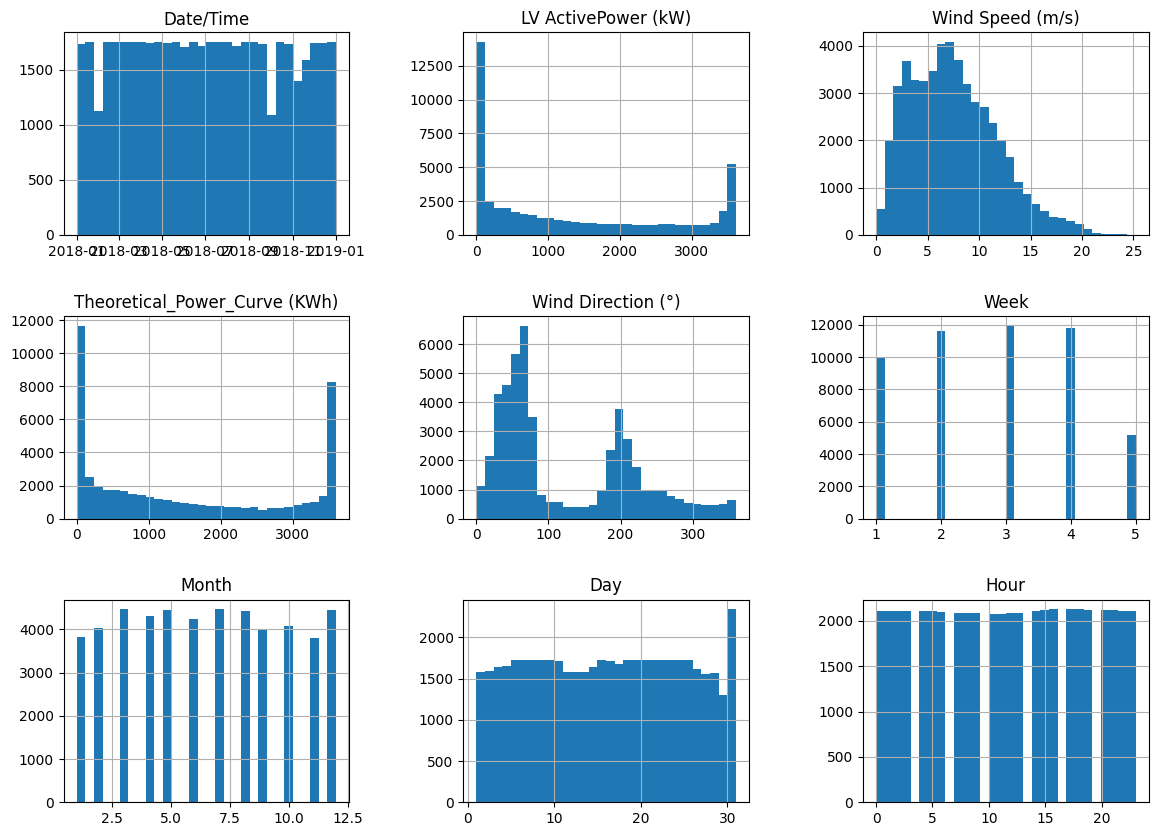

In [14]:
import matplotlib.pyplot as plt
data.hist(bins=30, figsize=(14, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

<Axes: xlabel='Month'>

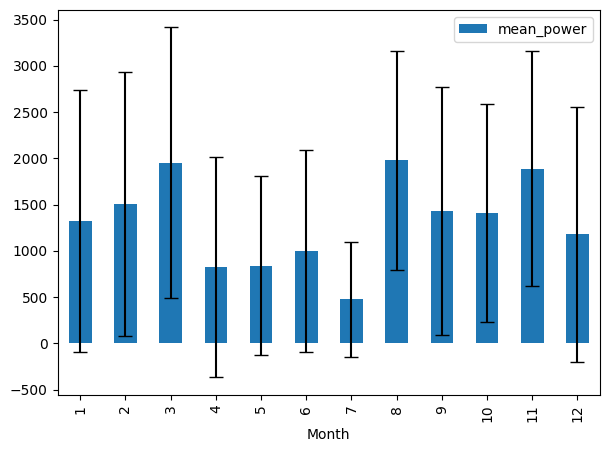

In [15]:
# Group by Month and calculate both mean and standard deviation
monthly_stats = data.groupby(["Month"], as_index=False).agg(
    mean_power=("LV ActivePower (kW)", "mean"),
    std_power=("LV ActivePower (kW)", "std")
)

# Create bar plot with error bars
monthly_stats.plot.bar(
    x="Month",
    y="mean_power",
    yerr="std_power",
    figsize=(7, 5),
    capsize=5  # Adds caps to error bars for better visibility
)

<Axes: xlabel='Hour'>

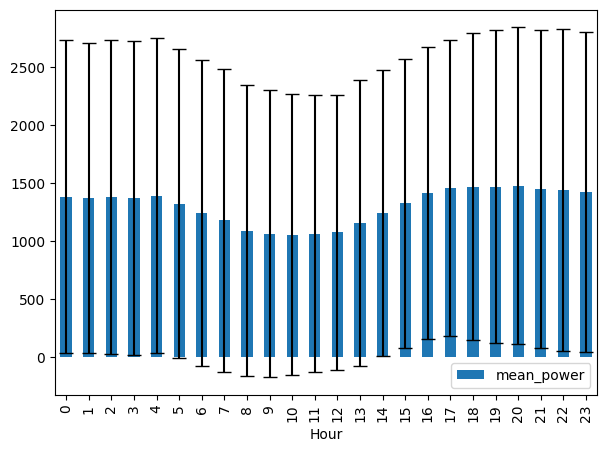

In [16]:
# Group by Hour and calculate both mean and standard deviation
hourly_stats = data.groupby(["Hour"], as_index=False).agg(
    mean_power=("LV ActivePower (kW)", "mean"),
    std_power=("LV ActivePower (kW)", "std")
)

# Create bar plot with error bars
hourly_stats.plot.bar(
    x="Hour",
    y="mean_power",
    yerr="std_power",
    figsize=(7, 5),
    capsize=5  # Adds caps to error bars for better visibility
)

High Power Output: From 0:00 AM to 5:00 AM and 16:00 PM to 23:00 PM. Power generation is consistently above 1350 kW

Low Power Output: From 6:00 AM to 14:00 PM. Noticeable dip around 9:00 to 11:00 AM, dropping close to 1050 kW

Inference: Wind turbine power generation is lower during late morning to early afternoon and peaks during night and evening hours.

## Correlation between Wind Speed, Wind Direction, and Power Production

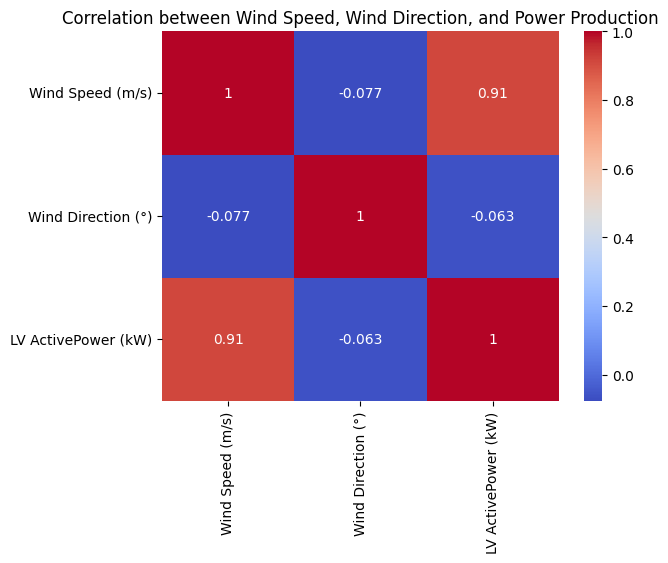

In [17]:
import seaborn as sns
correlation_matrix = data[['Wind Speed (m/s)', 'Wind Direction (°)', 'LV ActivePower (kW)']].corr()

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Wind Speed, Wind Direction, and Power Production')
plt.show()


Wind Speed is the dominant factor influencing power output.
Wind Direction does not significantly affect the power output or wind speed in this dataset.

## Scatter matrix

## Univariate Analysis

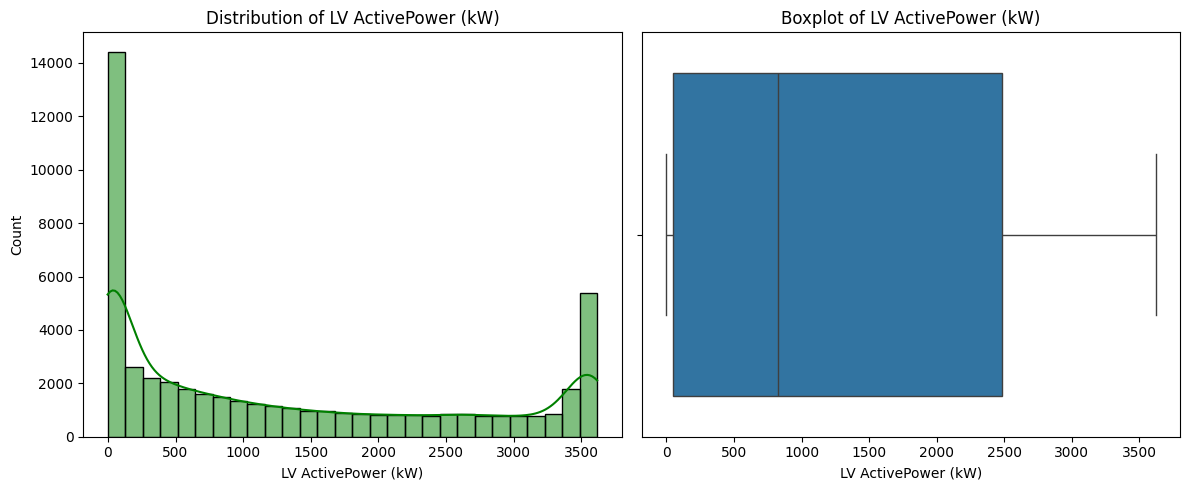

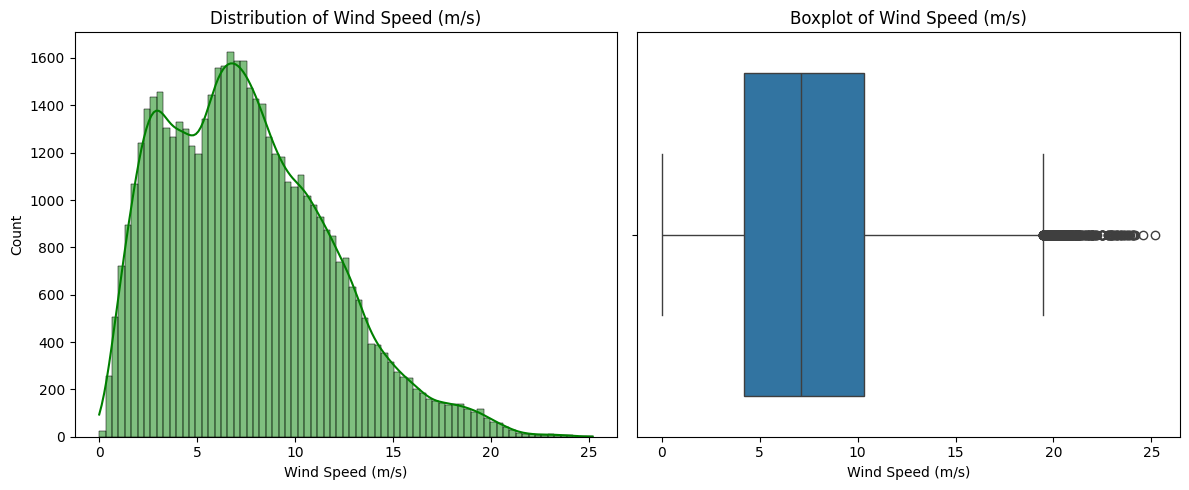

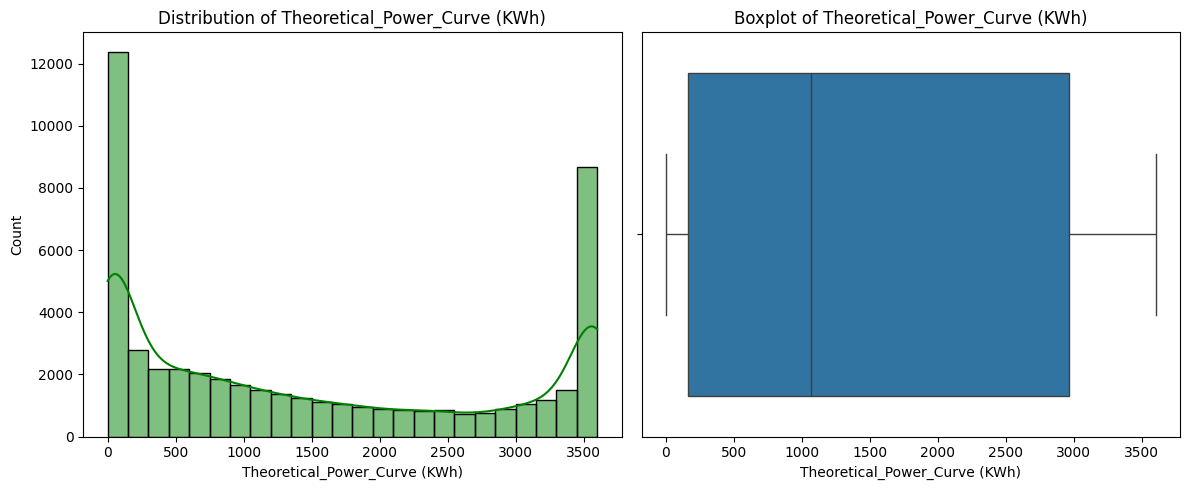

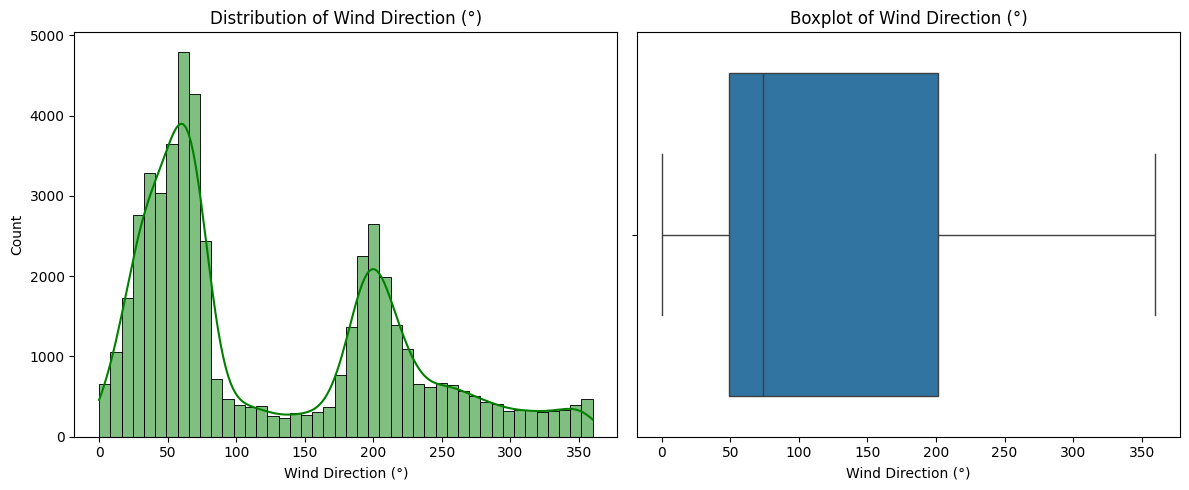

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Automatically select numerical columns from your DataFrame
num_col = data.select_dtypes(include=['float64', 'int64']).columns

# Plot distributions and boxplots
for col in num_col:
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(data[col], ax=ax[0], kde=True, color='green')  # Replaced deprecated sns.distplot
    ax[0].set_title(f'Distribution of {col}')
    sns.boxplot(x=data[col], ax=ax[1])
    ax[1].set_title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

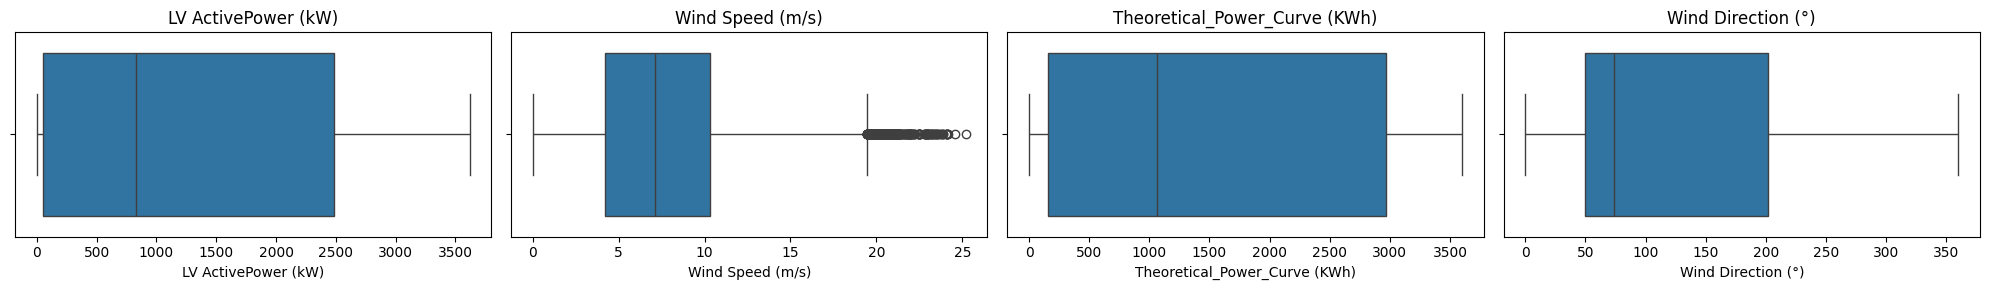

In [19]:
columns = ['LV ActivePower (kW)', 'Wind Speed (m/s)','Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']

plt.figure(figsize=(20, 3))
for i, each in enumerate(columns, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(x=data[each])
    plt.title(each)

plt.tight_layout()
plt.show()

       Wind Speed (m/s)  Theoretical_Power_Curve (KWh)  LV ActivePower (kW)
17361          1.816284                            0.0                  0.0
1329           1.243164                            0.0                  0.0
8477           2.975296                            0.0                  0.0
40503          1.787203                            0.0                  0.0
45243          1.520149                            0.0                  0.0


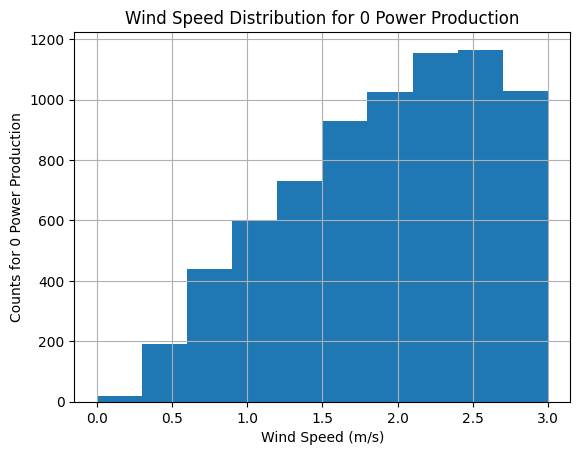

In [20]:
# Filter the data where both LV ActivePower and Theoretical_Power_Curve are equal to 0
zero_theo_power = data[(data['LV ActivePower (kW)'] == 0) & (data['Theoretical_Power_Curve (KWh)'] == 0)]

# Display a sample of the filtered data
print(zero_theo_power[['Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'LV ActivePower (kW)']].sample(5))

# Plot the wind speed distribution for 0 power production
zero_theo_power['Wind Speed (m/s)'].hist()
plt.title('Wind Speed Distribution for 0 Power Production')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Counts for 0 Power Production')
plt.show()

This graph indicates that zero power production is most commonly observed when the wind speed is in the upper range of very low speeds (around 2-3 m/s), suggesting a cut-in speed or operational threshold in that vicinity.

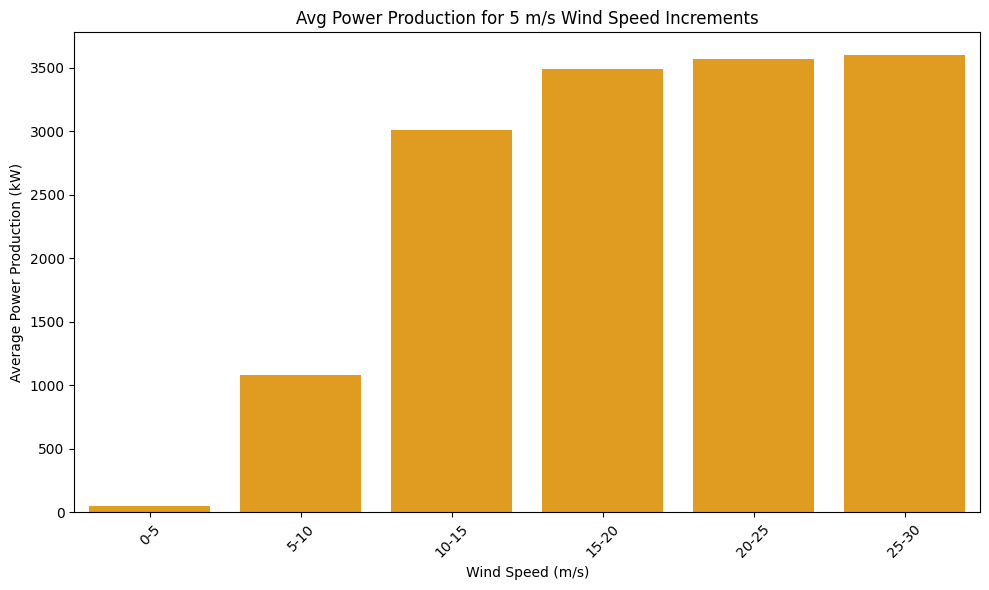

In [21]:
# Define the wind speed intervals
wind_speed_intervals = [0, 5, 10, 15, 20, 25, 30]
wind_speed = []
avg_power = []

# Calculate the average power production for each interval
for i in range(len(wind_speed_intervals) - 1):
    lower_bound = wind_speed_intervals[i]
    upper_bound = wind_speed_intervals[i + 1]
    avg_value = data[(data['Wind Speed (m/s)'] > lower_bound) & (data['Wind Speed (m/s)'] <= upper_bound)]['LV ActivePower (kW)'].mean()
    avg_power.append(avg_value)
    wind_speed.append(f'{lower_bound}-{upper_bound}')

# Manually include the last interval (20-25 m/s)
lower_bound = 20
upper_bound = 25
avg_value = data[(data['Wind Speed (m/s)'] > lower_bound) & (data['Wind Speed (m/s)'] <= upper_bound)]['LV ActivePower (kW)'].mean()
avg_power.append(avg_value)
wind_speed.append(f'{lower_bound}-{upper_bound}')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=wind_speed, y=avg_power, color='orange')
plt.title('Avg Power Production for 5 m/s Wind Speed Increments')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Average Power Production (kW)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Low power at low wind speeds, a rapid increase in power as wind speed increases beyond the cut-in speed, and a tendency to level off or saturate as the wind speed gets very high, approaching the turbine's rated power.

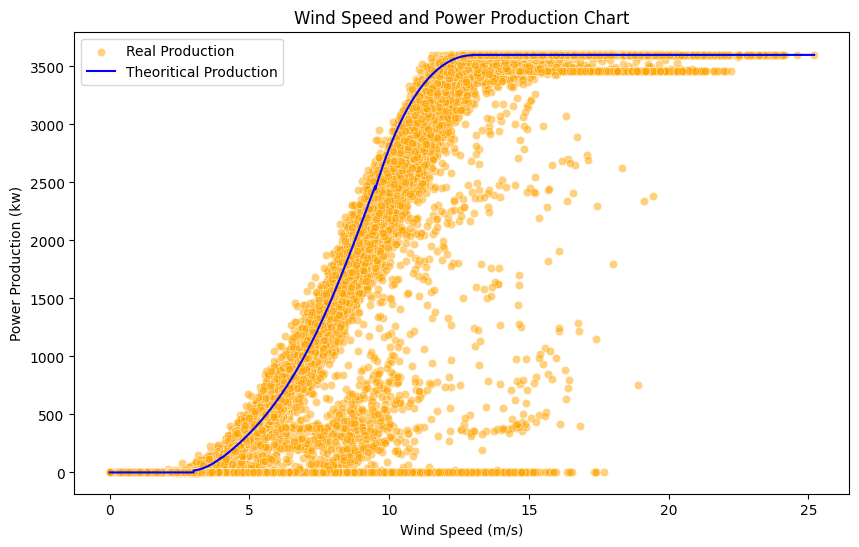

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Wind Speed (m/s)', y='LV ActivePower (kW)', color='orange', label='Real Production', alpha=0.5, data=data)
sns.lineplot(x='Wind Speed (m/s)', y='Theoretical_Power_Curve (KWh)', color='blue', label='Theoritical Production', data=data)
plt.title('Wind Speed and Power Production Chart')
plt.ylabel('Power Production (kw)');

This chart provides a visual representation of the wind turbine's power generation characteristics. It highlights the relationship between wind speed and power output, shows the theoretical performance envelope, and reveals the real-world variability in power production. It's a valuable tool for understanding the turbine's efficiency and identifying potential areas for improvement or concern.

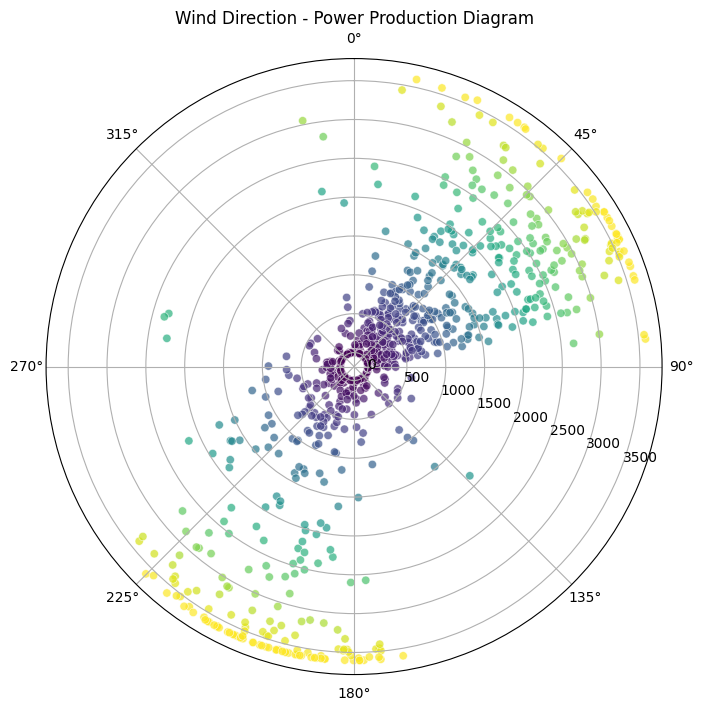

In [23]:
from math import radians

sample_df = data.sample(n=1000, random_state=1)

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Scatter plot with wind direction in radians and power production as radius
sns.scatterplot(x=[radians(x) for x in sample_df['Wind Direction (°)']],
                y=sample_df['LV ActivePower (kW)'],
                hue=sample_df['LV ActivePower (kW)'],
                alpha=0.7, legend=None, palette="viridis")

# Set the polar diagram's top to represent the North
ax.set_theta_zero_location('N')

# Set -1 to start the wind direction clockwise
ax.set_theta_direction(-1)

# Adjust radial label position for better visibility
ax.set_rlabel_position(110)

plt.title('Wind Direction - Power Production Diagram')
plt.ylabel(None)
plt.show()

The concentrations of high-power points suggest that the wind turbine is most efficient or experiences stronger winds more frequently when the wind comes from directions around 45° to 90° and 225° to 270°. These might be the prevailing wind directions at the turbine's location or directions where the turbine is optimally aligned.

## Numerical Columns over the Weeks

C:\Users\smart\AppData\Local\Temp\ipykernel_3224\4287520683.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Week'],y=data[col],data=data,ax=axes[row_idx,col_idx],errorbar=None,palette='rocket')
C:\Users\smart\AppData\Local\Temp\ipykernel_3224\4287520683.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Week'],y=data[col],data=data,ax=axes[row_idx,col_idx],errorbar=None,palette='rocket')
C:\Users\smart\AppData\Local\Temp\ipykernel_3224\4287520683.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Week'],y=data[c

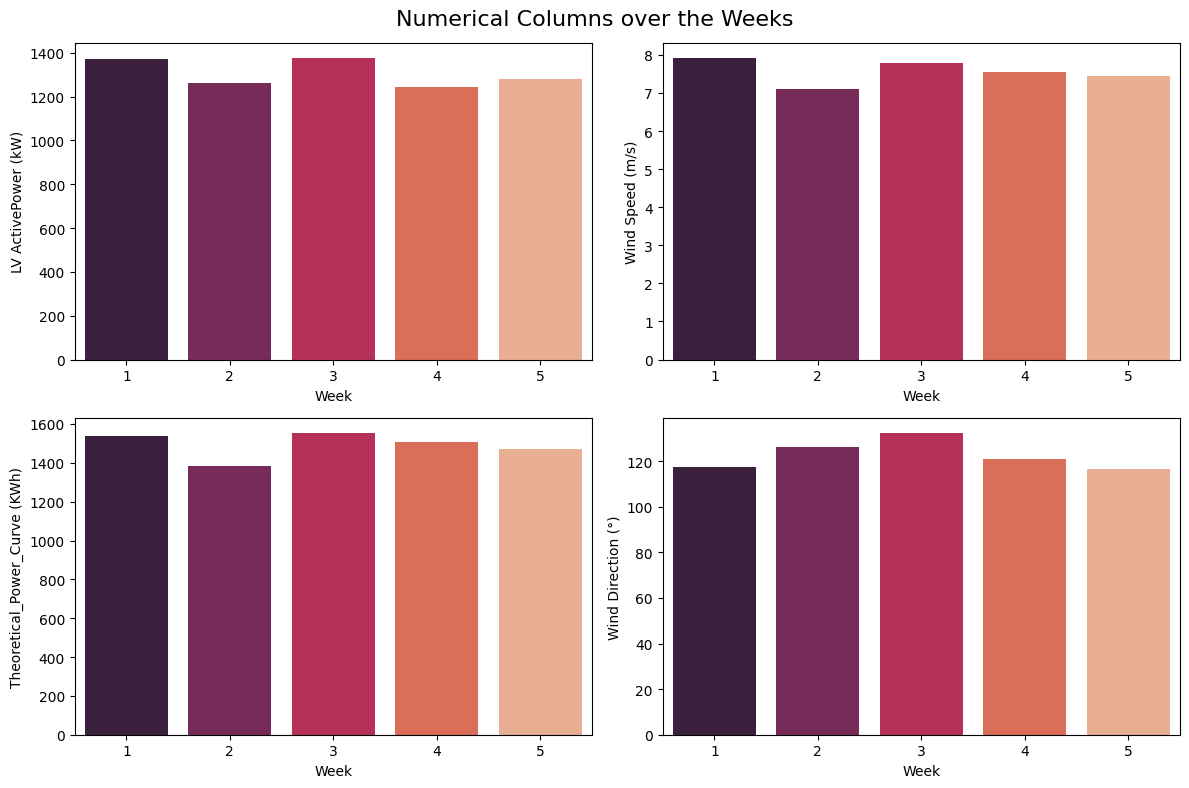

In [24]:
fig,axes=plt.subplots(nrows=len(num_col)//2 ,ncols=2,figsize=(12,8))
for idx,col in enumerate(data[num_col]):
    row_idx=idx//2
    col_idx=idx%2
    sns.barplot(x=data['Week'],y=data[col],data=data,ax=axes[row_idx,col_idx],errorbar=None,palette='rocket')
fig.suptitle('Numerical Columns over the Weeks', fontsize=16)
plt.tight_layout()
plt.show()

## Numerical Columns for each Month

C:\Users\smart\AppData\Local\Temp\ipykernel_3224\3771325950.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Month'],y=data[col],data=data,ax=axes[row_idx,col_idx],errorbar=None,palette='rocket')
C:\Users\smart\AppData\Local\Temp\ipykernel_3224\3771325950.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Month'],y=data[col],data=data,ax=axes[row_idx,col_idx],errorbar=None,palette='rocket')
C:\Users\smart\AppData\Local\Temp\ipykernel_3224\3771325950.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Month'],y=dat

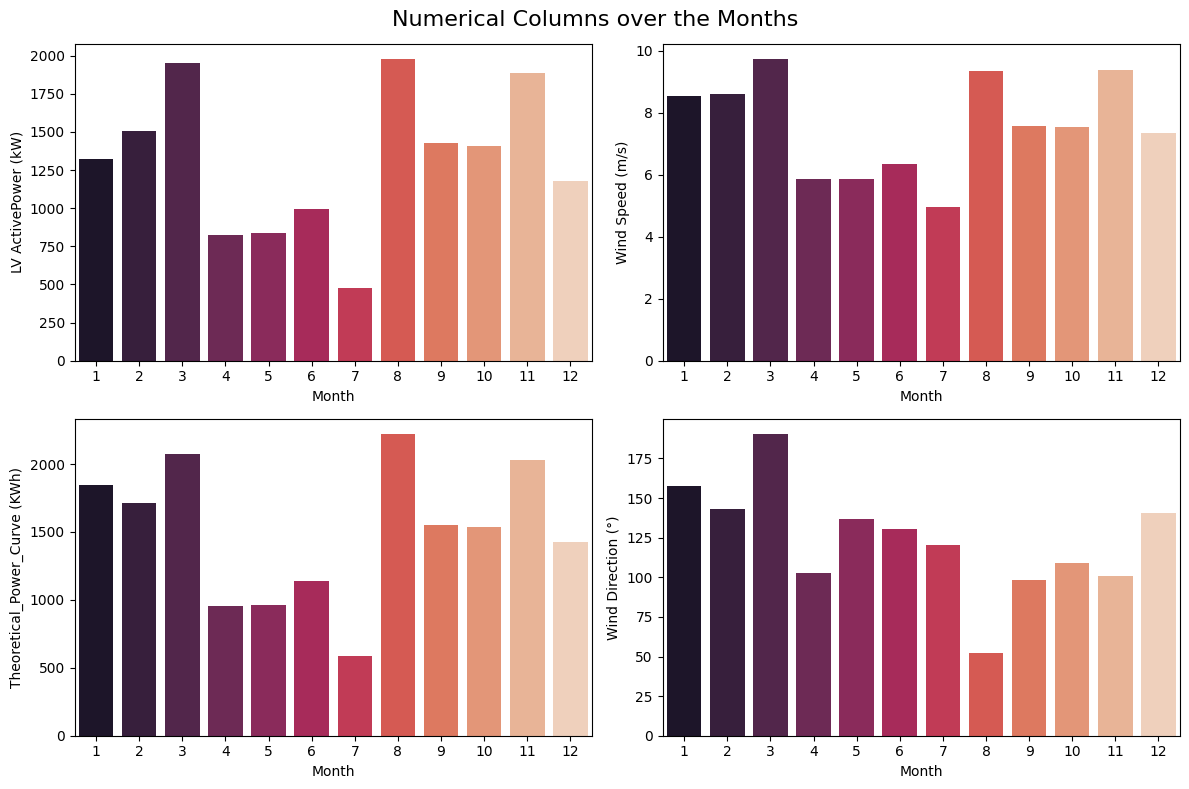

In [25]:
fig,axes=plt.subplots(nrows=len(num_col)//2 ,ncols=2,figsize=(12,8))
for idx,col in enumerate(data[num_col]):
    row_idx=idx//2
    col_idx=idx%2
    sns.barplot(x=data['Month'],y=data[col],data=data,ax=axes[row_idx,col_idx],errorbar=None,palette='rocket')
fig.suptitle('Numerical Columns over the Months', fontsize=16)
plt.tight_layout()
plt.show()

## Numerical Columns over the Seasons

C:\Users\smart\AppData\Local\Temp\ipykernel_3224\3759567655.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Seasons',y=data[col],data=data,ax=axes[row_idx,col_idx],ci=None,color='red')
C:\Users\smart\AppData\Local\Temp\ipykernel_3224\3759567655.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Seasons',y=data[col],data=data,ax=axes[row_idx,col_idx],ci=None,color='red')
C:\Users\smart\AppData\Local\Temp\ipykernel_3224\3759567655.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Seasons',y=data[col],data=data,ax=axes[row_idx,col_idx],ci=None,color='red')
C:\Users\smart\AppData\Local\Temp\ipykernel_3224\3759567655.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Seasons',y=data[col],data=data,ax=axes[row_idx,col_idx],ci=No

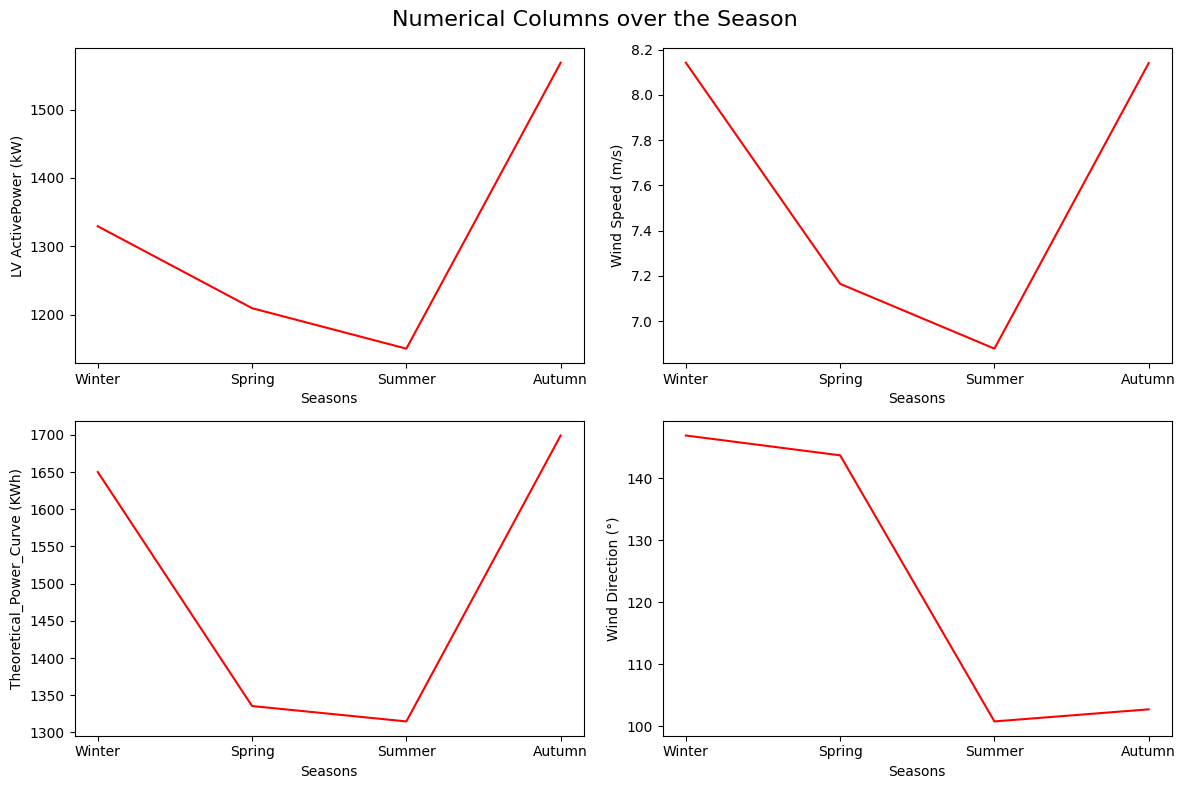

In [26]:
fig,axes=plt.subplots(nrows=len(num_col)//2 ,ncols=2,figsize=(12,8))
for idx,col in enumerate(data[num_col]):
    row_idx=idx//2
    col_idx=idx%2
    sns.lineplot(x='Seasons',y=data[col],data=data,ax=axes[row_idx,col_idx],ci=None,color='red')
fig.suptitle('Numerical Columns over the Season', fontsize=16)
plt.tight_layout()
plt.show()

In [27]:
datacpy=data.copy()
#renaming column names of copy dataframe
datacpy.rename(columns = {'LV ActivePower (kW)':'Actualpower'}, inplace = True)
datacpy.rename(columns = {'Wind Speed (m/s)':'Windspeed'}, inplace = True)
datacpy.rename(columns = {'Wind Direction (°)':'Winddir'}, inplace = True)
datacpy.rename(columns = {'Theoretical_Power_Curve (KWh)':'Thpower'}, inplace = True)
datacpy.rename(columns = {'Date/Time':'DateTime'}, inplace = True)

### Wind power of 2018

# Failure Condition

In [28]:
# Find cut-out speed
zero_power = data[data['LV ActivePower (kW)'] == 0]
high_wind_zero = zero_power[zero_power['Wind Speed (m/s)'] > 20]
if not high_wind_zero.empty:
    cutout_speed = high_wind_zero['Wind Speed (m/s)'].quantile(0.95)
    print(f"Estimated Cut-Out Speed: {cutout_speed:.2f} m/s")
else:
    cutout_speed = 25.0
    print("No zero-power instances above 20 m/s. Using default cut-out speed: 25.0 m/s")

# Calculate power difference and variance for failure condition
data['Power_Diff'] = (data['LV ActivePower (kW)'] - data['Theoretical_Power_Curve (KWh)']).abs()
diff_threshold = data['Power_Diff'].mean() + 2 * data['Power_Diff'].std()
data['Power_Variance'] = data['LV ActivePower (kW)'].rolling(window=5, min_periods=1).var()
var_threshold = data['Power_Variance'].quantile(0.95)

# Define new failure condition
def failure_condition(row):
    if (3 < row['Wind Speed (m/s)'] < cutout_speed and
        row['Theoretical_Power_Curve (KWh)'] > 0):
        # Check for any fault condition
        big_diff = row['Power_Diff'] > diff_threshold
        near_cutout = (cutout_speed - 2 <= row['Wind Speed (m/s)'] <= cutout_speed)
        low_output = row['LV ActivePower (kW)'] < 0.1 * row['Theoretical_Power_Curve (KWh)']
        drastic_change = row['Power_Variance'] > var_threshold
        zero_or_neg_power = row['LV ActivePower (kW)'] <= 0
        if (big_diff or
            (near_cutout and low_output) or
            drastic_change or
            zero_or_neg_power):
            return 1
        else:
            return 0
    else:
        return 0

data['Failure Condition'] = data.apply(failure_condition, axis=1)
data = data.drop(columns=['Power_Diff', 'Power_Variance'])
print(f"New Fault Count: {data['Failure Condition'].sum()}")

# Anomaly removal
data = data[data['LV ActivePower (kW)'] >= 0]
data_normal = data[data['Failure Condition'] == 0]
data_fault = data[data['Failure Condition'] == 1]

# Big difference
power_diff = (data_normal['LV ActivePower (kW)'] - data_normal['Theoretical_Power_Curve (KWh)']).abs()
data_normal = data_normal[power_diff <= diff_threshold]

# Lower output near cut-out speed
near_cutout = (data_normal['Wind Speed (m/s)'] >= cutout_speed - 2) & (data_normal['Wind Speed (m/s)'] <= cutout_speed)
low_output = data_normal['LV ActivePower (kW)'] < 0.1 * data_normal['Theoretical_Power_Curve (KWh)']
data_normal = data_normal[~(near_cutout & low_output)]

# Inconsistent power output
data_normal['Power_Variance'] = data_normal['LV ActivePower (kW)'].rolling(window=5, min_periods=1).var()
data_normal = data_normal[data_normal['Power_Variance'] <= var_threshold]
data_normal = data_normal.drop(columns=['Power_Variance'])

# Combine cleaned normal data with fault data
data_clean = pd.concat([data_normal, data_fault])
print(f"Original Data Size: {len(data)}, Cleaned Data Size: {len(data_clean)}")
print(f"Original Fault Count: {data['Failure Condition'].sum()}, Cleaned Fault Count: {data_clean['Failure Condition'].sum()}")

No zero-power instances above 20 m/s. Using default cut-out speed: 25.0 m/s
New Fault Count: 6450
Original Data Size: 50473, Cleaned Data Size: 49336
Original Fault Count: 6433, Cleaned Fault Count: 6433


In [30]:
# Print data after applying failure condition
print("\nData After Applying Failure Condition (First 5 Rows):")
print(data.head())


Data After Applying Failure Condition (First 5 Rows):
            Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0 2018-01-01 00:00:00           380.047791          5.311336   
1 2018-01-01 00:10:00           453.769196          5.672167   
2 2018-01-01 00:20:00           306.376587          5.216037   
3 2018-01-01 00:30:00           419.645905          5.659674   
4 2018-01-01 00:40:00           380.650696          5.577941   

   Theoretical_Power_Curve (KWh)  Wind Direction (°)  Week  Month Seasons  \
0                     416.328908          259.994904     1      1  Winter   
1                     519.917511          268.641113     1      1  Winter   
2                     390.900016          272.564789     1      1  Winter   
3                     516.127569          271.258087     1      1  Winter   
4                     491.702972          265.674286     1      1  Winter   

   Day  Hour  Failure Condition  
0    1     0                  0  
1    1     0                 

In [31]:
print("\nFailure Condition Distribution:")
print(data['Failure Condition'].value_counts())


Failure Condition Distribution:
Failure Condition
0    44040
1     6433
Name: count, dtype: int64


In [32]:
print("\nFault Data Only (First 10 Rows):")
print(data[data['Failure Condition'] == 1].head(10))


Fault Data Only (First 10 Rows):
              Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
191 2018-01-02 07:50:00          3599.149902         13.058600   
220 2018-01-02 12:40:00          2178.658936          9.117029   
221 2018-01-02 12:50:00          2244.412109          9.253191   
222 2018-01-02 13:00:00          1278.895020          9.072307   
223 2018-01-02 13:10:00          2832.934082         10.344630   
224 2018-01-02 13:20:00          3205.972900         11.103310   
225 2018-01-02 13:30:00          3149.284912         11.069110   
226 2018-01-02 13:40:00          3273.656006         11.325810   
267 2018-01-02 20:30:00          3391.716064         11.859290   
268 2018-01-02 20:40:00          3587.510986         12.811480   

     Theoretical_Power_Curve (KWh)  Wind Direction (°)  Week  Month Seasons  \
191                    3600.000000          200.607803     1      1  Winter   
220                    2219.691985          201.024506     1      1  Winter   
22

In [33]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
                           Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
count                          50473         50473.000000      50473.000000   
mean   2018-07-01 20:58:44.799397632          1309.161489          7.563317   
min              2018-01-01 00:00:00             0.000000          0.000000   
25%              2018-04-03 07:20:00            52.740540          4.210382   
50%              2018-06-30 17:10:00           828.006714          7.111886   
75%              2018-09-26 19:20:00          2484.364014         10.303410   
max              2018-12-31 23:50:00          3618.732910         25.206011   
std                              NaN          1312.463427          4.226509   

       Theoretical_Power_Curve (KWh)  Wind Direction (°)          Week  \
count                   50473.000000        50473.000000  50473.000000   
mean                     1493.846082          123.648102      2.816674   
min                         0.000000         

In [34]:
# Sort by time to ensure chronological failure tracking
data = data.sort_values('Date/Time')

# Keep only rows where a failure occurred
failure_times = data[data['Failure Condition'] == 1]['Date/Time']

# Calculate time differences in hours between failures
time_deltas = failure_times.diff().dropna().dt.total_seconds() / 3600  # convert to hours

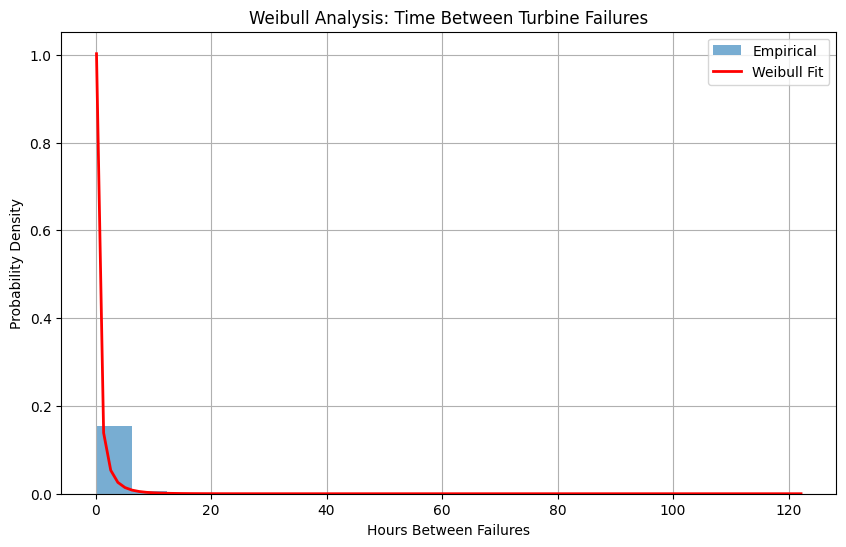

Weibull Shape (β): 0.59
Weibull Scale (η): 0.67


In [35]:
from scipy.stats import weibull_min
import numpy as np
import matplotlib.pyplot as plt

# Fit the Weibull distribution
shape, loc, scale = weibull_min.fit(time_deltas, floc=0)

# Plot the distribution
x = np.linspace(min(time_deltas), max(time_deltas), 100)
y = weibull_min.pdf(x, shape, loc, scale)

plt.figure(figsize=(10, 6))
plt.hist(time_deltas, bins=20, density=True, alpha=0.6, label='Empirical')
plt.plot(x, y, 'r-', lw=2, label='Weibull Fit')
plt.title('Weibull Analysis: Time Between Turbine Failures')
plt.xlabel('Hours Between Failures')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()

print(f"Weibull Shape (β): {shape:.2f}")
print(f"Weibull Scale (η): {scale:.2f}")

The sharp peak near zero suggests that a large proportion of failures happen within a very short time after the previous one, indicating high failure frequency or poor recovery/resolution.

The long tail indicates that while rare, some failures are separated by longer intervals, but their probability is very low.

The shape of the red Weibull curve suggests a "decreasing failure rate", which could imply:

Failures are more likely right after repairs (possibly due to improper maintenance or recurring faults).

The system may not be stabilizing well post-failure.
So in your case, β = 0.59 means:

Failures are more likely to occur early in the system's operation — possibly due to poor maintenance, setup errors, or early wear-in issues.

Weibull Scale (η = 0.67)
This defines the characteristic life — the time by which ~63.2% of units are expected to fail.

It “scales” the x-axis of the distribution.

η = 0.67 means:

Approximately 63% of your failures happen within 0.67 time units (likely hours or days, depending on your data).

# Data Normalization

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_cols = ['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Wind Direction (°)','Theoretical_Power_Curve (KWh)','Hour','Month']
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [37]:
# Split the data into features and target
X = data[['Month','Hour', 'Wind Speed (m/s)', 'LV ActivePower (kW)','Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']]
y = data['Failure Condition']

# Handling Imbalanced dataset

In [38]:
import collections
from imblearn.over_sampling import SMOTE
# Check the distribution of your classes
print(collections.Counter(y))


Counter({0: 44040, 1: 6433})


## SMOTE for balancing the dataset

In [39]:
# Identify classes with very few samples (e.g., 1 sample)
unique_classes = collections.Counter(y)
minority_classes = [cls for cls, count in unique_classes.items() if count == 1]
print("Classes with only 1 sample:", minority_classes)

# Remove rows with classes that have only 1 sample
data = data[~data['Failure Condition'].isin(minority_classes)]

# Re-split features and target after removing problematic class
X = data[['Month','Hour', 'Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']]
y = data['Failure Condition']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)


print("Class distribution after SMOTE:", collections.Counter(y_smote))

Classes with only 1 sample: []
Class distribution after SMOTE: Counter({0: 44040, 1: 44040})


# Test Train Split

In [40]:
from sklearn.model_selection import train_test_split
# Split data into training and test sets (for SMOTE)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)
# Display the shapes of the resulting datasets
print("X_train shape:", X_train_smote.shape)
print("X_test shape:", X_test_smote.shape)
print("y_train shape:", y_train_smote.shape)
print("y_test shape:", y_test_smote.shape)

X_train shape: (70464, 5)
X_test shape: (17616, 5)
y_train shape: (70464,)
y_test shape: (17616,)


In [41]:
def train_and_evaluate(X_train, X_test, y_train, y_test, dataset_name):
    print(f"\n=== {dataset_name} Dataset ===")
    for model_name, model in models.items():
        model.fit(X_train, y_train)  # Train model
        y_pred = model.predict(X_test)  # Predict classes
        # Get probabilities for the positive class (class 1) only
        y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        # Print results
        print(f"\n{model_name} - Classification Report:")
        print(classification_report(y_test, y_pred))
        print(f"{model_name} - Accuracy: {accuracy_score(y_test, y_pred):.4f}")

        # # ROC AUC Score (for multi-class)
        # if y_pred_prob is not None:
        #     print(f"{model_name} - ROC AUC: {roc_auc_score(y_test, y_pred_prob, multi_class='ovr'):.4f}")

# ALL ML Classifiers


=== Evaluation on SMOTE Dataset ===

----- RandomForest -----
Accuracy     : 0.9383
ROC AUC      : 0.9831
Macro Avg    : {'Precision': 0.9387, 'Recall': 0.9382, 'F1-Score': 0.9383}
Weighted Avg : {'Precision': 0.9386, 'Recall': 0.9383, 'F1-Score': 0.9383}


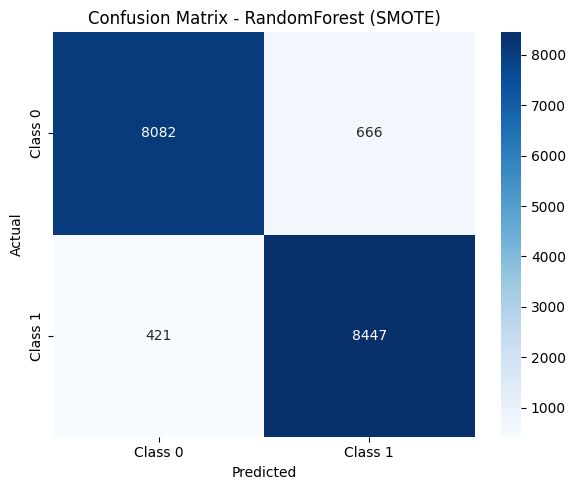


----- KNN -----
Accuracy     : 0.9126
ROC AUC      : 0.9638
Macro Avg    : {'Precision': 0.9186, 'Recall': 0.9122, 'F1-Score': 0.9122}
Weighted Avg : {'Precision': 0.9183, 'Recall': 0.9126, 'F1-Score': 0.9122}


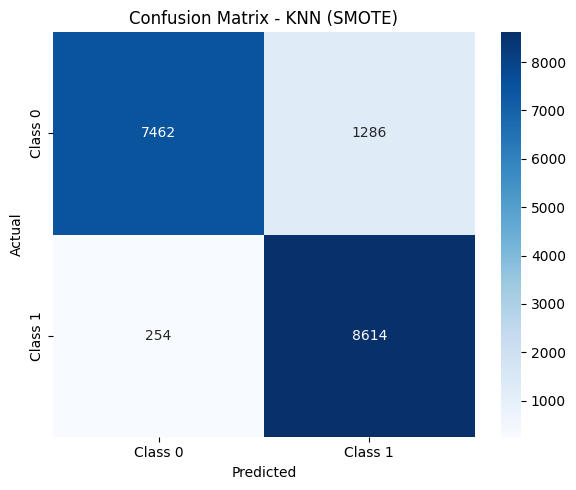


----- SVM -----
Accuracy     : 0.7471
ROC AUC      : 0.8227
Macro Avg    : {'Precision': 0.7474, 'Recall': 0.747, 'F1-Score': 0.747}
Weighted Avg : {'Precision': 0.7473, 'Recall': 0.7471, 'F1-Score': 0.747}


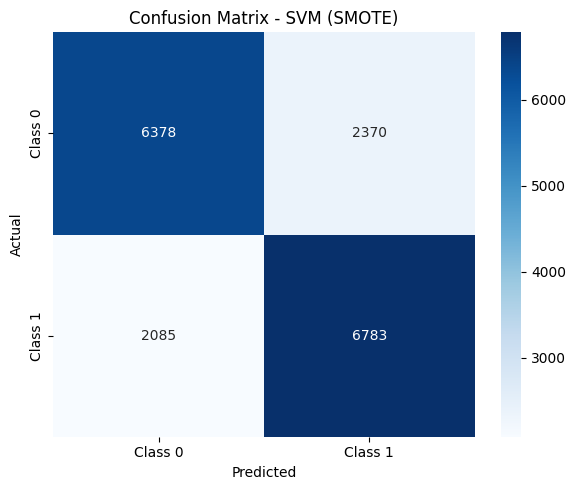


----- DecisionTree -----
Accuracy     : 0.9129
ROC AUC      : 0.9129
Macro Avg    : {'Precision': 0.9131, 'Recall': 0.9129, 'F1-Score': 0.9129}
Weighted Avg : {'Precision': 0.913, 'Recall': 0.9129, 'F1-Score': 0.9129}


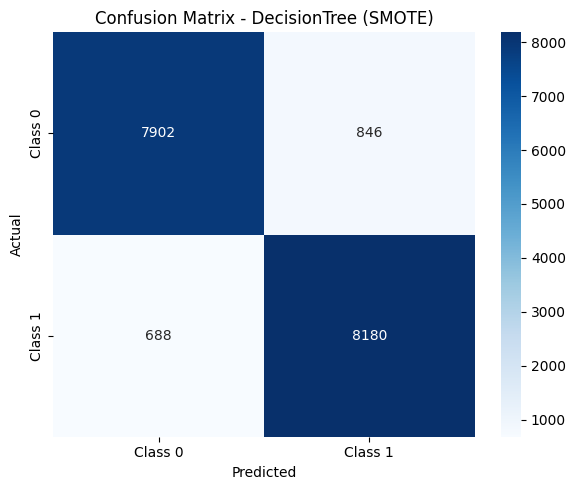


----- NeuralNetwork -----
Accuracy     : 0.8617
ROC AUC      : 0.9360
Macro Avg    : {'Precision': 0.863, 'Recall': 0.8614, 'F1-Score': 0.8615}
Weighted Avg : {'Precision': 0.8629, 'Recall': 0.8617, 'F1-Score': 0.8615}


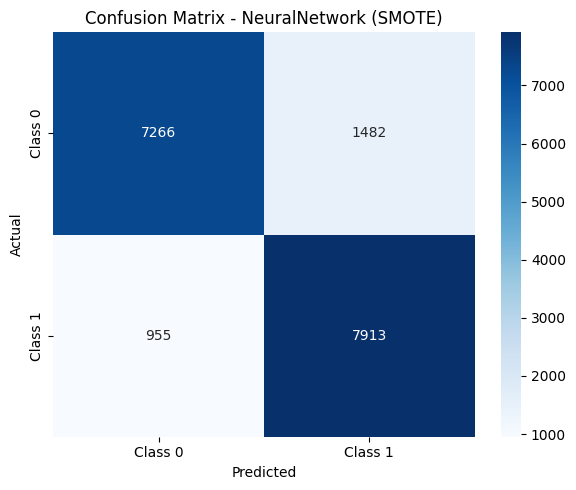

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define models
models = {
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(probability=True, random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "NeuralNetwork": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

# Dataset dictionary
datasets = {
    "SMOTE": (X_train_smote, X_test_smote, y_train_smote, y_test_smote),
}

# Store results for plotting
results = {
    dataset_name: {
        "accuracy": {},
        "roc_auc": {}
    } for dataset_name in datasets
}

# Evaluation and Confusion Matrix Display
for dataset_name, (X_train, X_test, y_train, y_test) in datasets.items():
    print(f"\n=== Evaluation on {dataset_name} Dataset ===")

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        acc = accuracy_score(y_test, y_pred)
        roc = roc_auc_score(y_test, y_proba) if y_proba is not None else 0
        report = classification_report(y_test, y_pred, output_dict=True)
        cm = confusion_matrix(y_test, y_pred)

        # Save for plotting
        results[dataset_name]["accuracy"][model_name] = acc
        results[dataset_name]["roc_auc"][model_name] = roc

        # Initialize nested metrics if not already present
        if "macro avg" not in results[dataset_name]:
            results[dataset_name]["macro avg"] = {}
            results[dataset_name]["weighted_avg"] = {}

        results[dataset_name]["macro avg"][model_name] = {
            "precision": report['macro avg']['precision'],
            "recall": report['macro avg']['recall'],
            "f1-score": report['macro avg']['f1-score']
        }

        results[dataset_name]["weighted_avg"][model_name] = {
            "precision": report['weighted avg']['precision'],
            "recall": report['weighted avg']['recall'],
            "f1-score": report['weighted avg']['f1-score']
}


        # Print metrics
        print(f"\n----- {model_name} -----")
        print(f"Accuracy     : {acc:.4f}")
        print(f"ROC AUC      : {roc:.4f}")
        print("Macro Avg    :", {
            "Precision": round(report['macro avg']['precision'], 4),
            "Recall": round(report['macro avg']['recall'], 4),
            "F1-Score": round(report['macro avg']['f1-score'], 4)
        })
        print("Weighted Avg :", {
            "Precision": round(report['weighted avg']['precision'], 4),
            "Recall": round(report['weighted avg']['recall'], 4),
            "F1-Score": round(report['weighted avg']['f1-score'], 4)
        })

        # Confusion Matrix
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                    xticklabels=["Class 0", "Class 1"],
                    yticklabels=["Class 0", "Class 1"])
        plt.title(f"Confusion Matrix - {model_name} ({dataset_name})")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.tight_layout()
        plt.show()

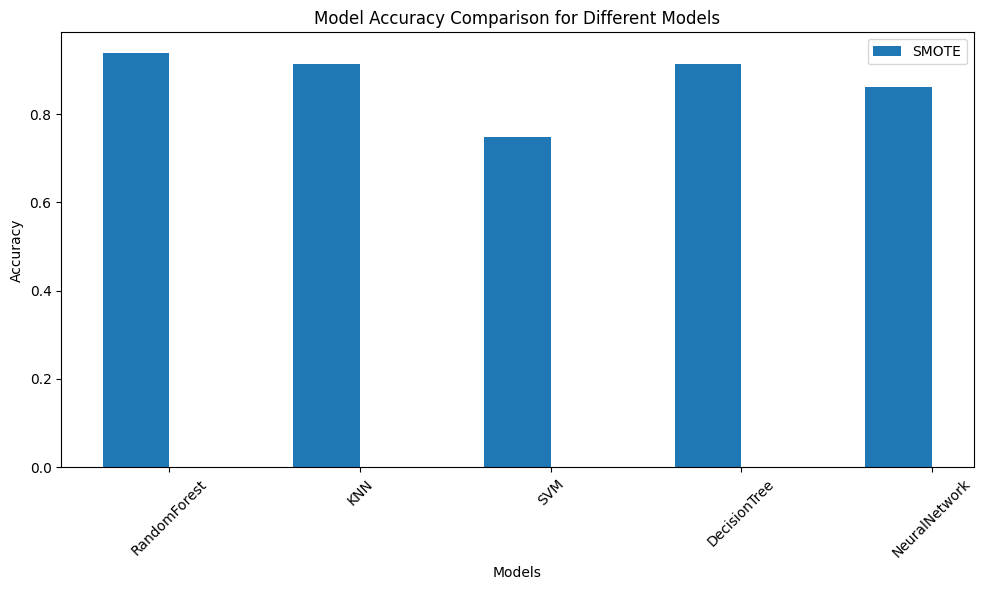

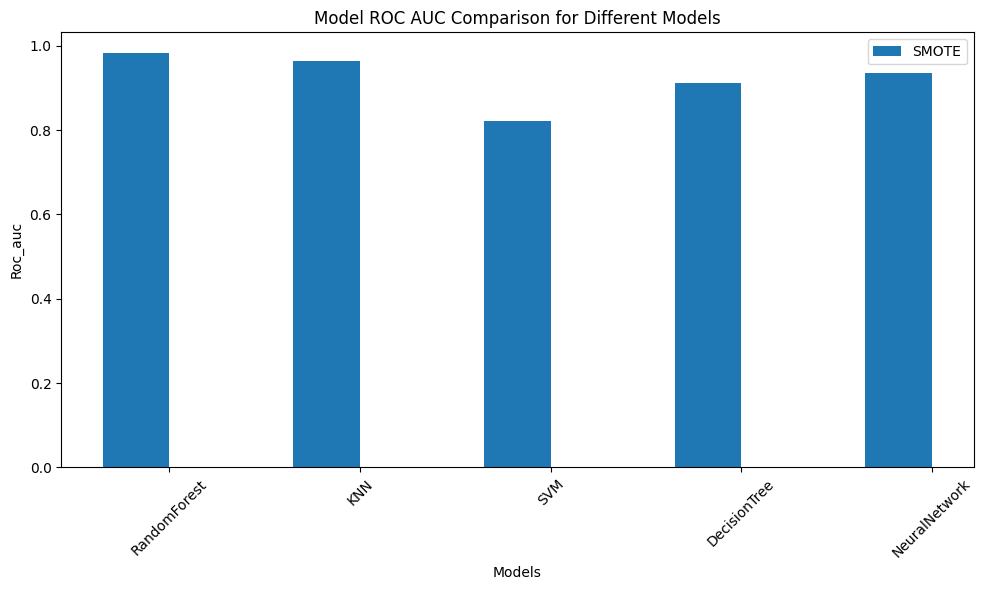

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot results (Accuracy or ROC AUC)
def plot_results(metric, title):
    fig, ax = plt.subplots(figsize=(10, 6))
    x_labels = list(models.keys())  # Model names
    x = np.arange(len(x_labels))  # X-axis positions

    width = 0.35  # Width of bars

    for i, (dataset_name, dataset_results) in enumerate(results.items()):
        values = [dataset_results[metric][model] for model in x_labels]
        ax.bar(x + (i * width), values, width, label=f"{dataset_name}")

    ax.set_xlabel("Models")
    ax.set_ylabel(metric.capitalize())
    ax.set_title(f"{title} for Different Models")
    ax.set_xticks(x + width / 2)
    ax.set_xticklabels(x_labels, rotation=45)
    ax.legend()
    plt.tight_layout()
    plt.show()

# Plot Accuracy Comparison
plot_results("accuracy", "Model Accuracy Comparison")

# Plot ROC AUC Comparison
plot_results("roc_auc", "Model ROC AUC Comparison")

# Model Prediction

In [59]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

# Assuming 'data' is your DataFrame

# Select only numerical features for scaling and modeling
numerical_features = ['Wind Speed (m/s)', 'Wind Direction (°)', 'Theoretical_Power_Curve (KWh)']

# Create a scaler object
scaler = StandardScaler()

# Fit and transform the scaler on the selected numerical features
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Define your features (X) and target (y)
X = data[numerical_features]  # Use only the scaled numerical features
y = data['LV ActivePower (kW)']

# Now proceed with your train-test split and model training
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# ... (rest of your code) ...
# Impute or remove missing values before training
x_train = x_train.fillna(x_train.mean()) # Impute with mean
x_test = x_test.fillna(x_test.mean())   # Impute with mean
# or, to remove rows with missing values:
# x_train = x_train.dropna()
# x_test = x_test.dropna()



model_name = []
r2score = []
rmse = []
models = [
    SVR(),
    RandomForestRegressor(random_state=42),
    LinearRegression(),
    ExtraTreesRegressor(random_state=42),
    AdaBoostRegressor(random_state=42),
    DecisionTreeRegressor(random_state=42),
    XGBRegressor(random_state=42),
    XGBRFRegressor(random_state=42),
    CatBoostRegressor(random_state=42, verbose=False)
]

for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    model_name.append(model.__class__.__name__)
    r2score.append(r2_score(y_test, y_pred) * 100) #removed str conversion
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))  # Calculate RMSE manually using np.sqrt

models_df = pd.DataFrame({"Model-Name":model_name, "R2_score": r2score ,'RMSE':rmse})
#models_df = models_df.astype({"R2_score": float, "RMSE": float}) #no need to convert, it's already in that type.
models_df.sort_values("R2_score", ascending = False)

,Model-Name,R2_score,RMSE
8,CatBoostRegressor,91.837175,0.286402
7,XGBRFRegressor,91.821911,0.286670
6,XGBRegressor,91.240830,0.296680
0,SVR,91.057210,0.299773
2,LinearRegression,90.876096,0.302794
1,RandomForestRegressor,90.588706,0.307525
3,ExtraTreesRegressor,89.847740,0.319402
4,AdaBoostRegressor,86.394811,0.369750
5,DecisionTreeRegressor,82.648154,0.417570


R-squared tells you how well the model explains the variance in the target variable (how much of the change in power output can be attributed to the wind speed, direction, and theoretical curve). A higher R-squared is generally desirable.
RMSE tells you the average size of the errors your model is making in its predictions (in the same units as the power output). A lower RMSE is generally desirable.

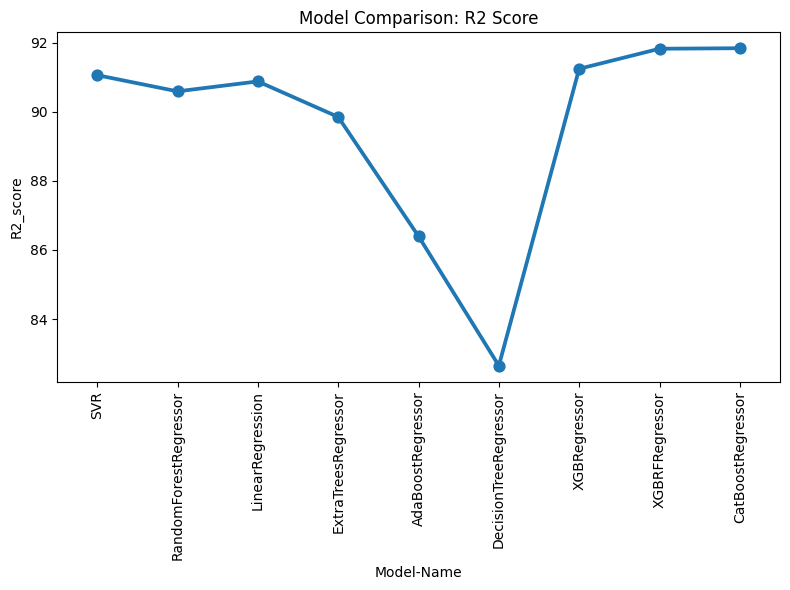

In [60]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model-Name',y='R2_score',data=models_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: R2 Score')
plt.tight_layout()
plt.show()

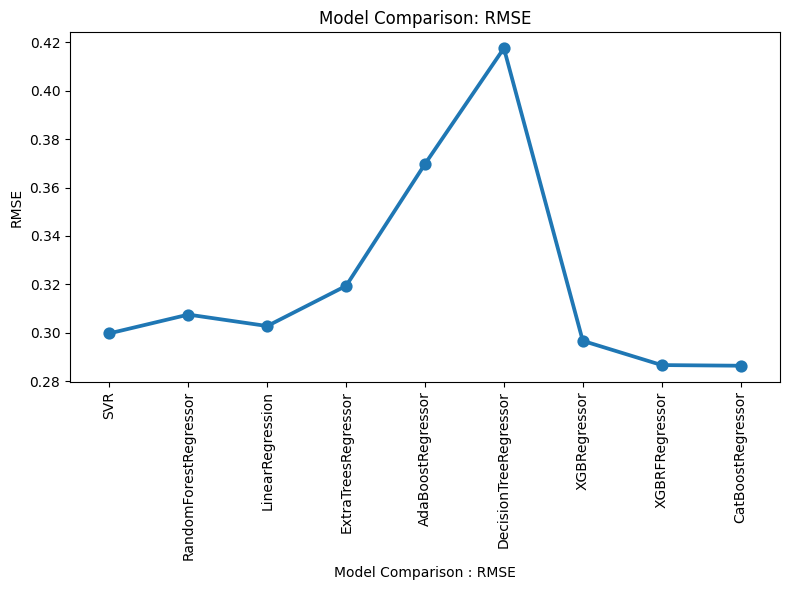

In [61]:
plt.figure(figsize=(8,6))
plt.xlabel('Model Comparison : RMSE')
sns.pointplot(x='Model-Name',y='RMSE',data=models_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: RMSE')
plt.tight_layout()
plt.show()

## Fine tune the model (RandomizedSearchCV estimator: CatBoostRegressor)

In [46]:
fm=CatBoostRegressor(random_state=42)

#Prepare a set of hyperparameters to search over
param_grid = {
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'iterations': [100, 200, 300, 400, 500],  # Equivalent to n_estimators
    'depth': [3, 5, 7, 9],  # Equivalent to max_depth
    'subsample': np.linspace(0.5, 1.0, 6),
    'colsample_bylevel': np.linspace(0.5, 1.0, 6),  # Equivalent to colsample_bytree
    'l2_leaf_reg': np.linspace(0.01, 1.0, 10),  # Equivalent to reg_lambda
    'min_child_samples': [1, 5, 10, 15],  # Equivalent to min_child_weight
}
#Create the GridSearchCV object and specify the number of folds for cross-validation
from sklearn.metrics import make_scorer
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)
random_search = RandomizedSearchCV(estimator=fm, param_distributions=param_grid, n_iter=50, scoring=rmse_scorer , n_jobs=-1,error_score='raise')

In [47]:
#Fit the RandmoizedSearch object to your training data:
random_search.fit(x_train, y_train, verbose=False)

RandomizedSearchCV(error_score='raise',
                   estimator=<catboost.core.CatBoostRegressor object at 0x0000014B576FB750>,
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bylevel': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'depth': [3, 5, 7, 9],
                                        'iterations': [100, 200, 300, 400, 500],
                                        'l2_leaf_reg': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]),
                                        'learning_rate': array([0.01      , 0.04222222, 0.07444444, 0.10666667, 0.13888889,
       0.17111111, 0.20333333, 0.23555556, 0.26777778, 0.3       ]),
                                        'min_child_samples': [1, 5, 10, 15],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
                   scoring=make_scorer(rmse, greater_is_better=False, response_method='predict'))

In [48]:
#Inspect the best parameters and score:
best_params = random_search.best_params_
best_score = random_search.best_score_
print('Best Parameters: ', best_params)
print('Best RMSE: ', best_score)
#Use the best parameters to re-train your model and make predictions on the test data:
best_model = CatBoostRegressor(**best_params)
best_model.fit(x_train, y_train,verbose=False)
y_pred = best_model.predict(x_test)

Best Parameters:  {'subsample': 1.0, 'min_child_samples': 15, 'learning_rate': 0.07444444444444444, 'l2_leaf_reg': 0.56, 'iterations': 300, 'depth': 5, 'colsample_bylevel': 1.0}
Best RMSE:  -0.2889265425405655


c:\Users\smart\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\smart\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\smart\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the fi


 Training MLP Model...

Epoch 1/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6077 - loss: 0.6476 - val_accuracy: 0.7087 - val_loss: 0.5622
Epoch 2/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7046 - loss: 0.5592 - val_accuracy: 0.7663 - val_loss: 0.4861
Epoch 3/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7489 - loss: 0.5064 - val_accuracy: 0.7785 - val_loss: 0.4625
Epoch 4/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7616 - loss: 0.4845 - val_accuracy: 0.7811 - val_loss: 0.4555
Epoch 5/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7664 - loss: 0.4746 - val_accuracy: 0.7834 - val_loss: 0.4465
Epoch 6/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7686 - loss: 0.4718 - val_accuracy: 0.7901 - val_loss: 0.4449
Epoch 7/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7713 - loss: 0.4682 - val_accuracy: 0.7901 - val_loss: 0.4448
Epoch 8/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy:

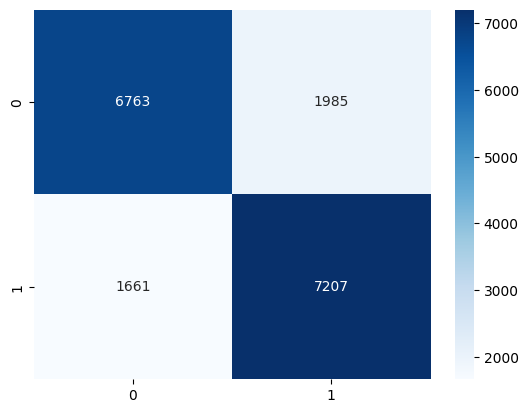


 Training CNN Model...

Epoch 1/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6412 - loss: 0.6269 - val_accuracy: 0.7118 - val_loss: 0.5647
Epoch 2/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7157 - loss: 0.5522 - val_accuracy: 0.7597 - val_loss: 0.4961
Epoch 3/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7649 - loss: 0.4916 - val_accuracy: 0.7768 - val_loss: 0.4663
Epoch 4/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7787 - loss: 0.4643 - val_accuracy: 0.7859 - val_loss: 0.4516
Epoch 5/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7834 - loss: 0.4518 - val_accuracy: 0.7864 - val_loss: 0.4471
Epoch 6/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7878 - loss: 0.4453 - val_accuracy: 0.7921 - val_loss: 0.4373
Epoch 7/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7952 - loss: 0.4354 - val_accuracy: 0.7862 - val_loss: 0.4480
Epoch 8/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy:

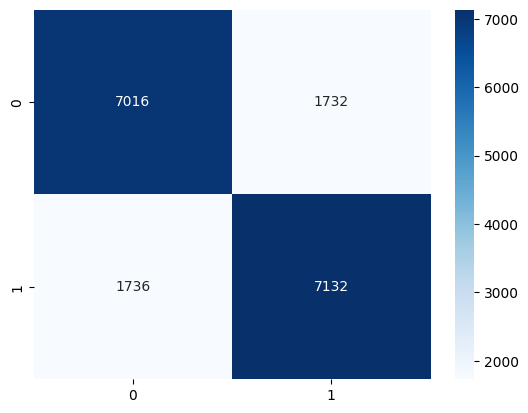


 Training LSTM Model...

Epoch 1/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5900 - loss: 0.6542 - val_accuracy: 0.6916 - val_loss: 0.5656
Epoch 2/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7031 - loss: 0.5562 - val_accuracy: 0.7667 - val_loss: 0.4919
Epoch 3/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7633 - loss: 0.4861 - val_accuracy: 0.7840 - val_loss: 0.4587
Epoch 4/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7708 - loss: 0.4682 - val_accuracy: 0.7761 - val_loss: 0.4627
Epoch 5/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7806 - loss: 0.4513 - val_accuracy: 0.7956 - val_loss: 0.4405
Epoch 6/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7869 - loss: 0.4448 - val_accuracy: 0.7877 - val_loss: 0.4406
Epoch 7/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7872 - loss: 0.4398 - val_accuracy: 0.7979 - val_loss: 0.4268
Epoch 8/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy

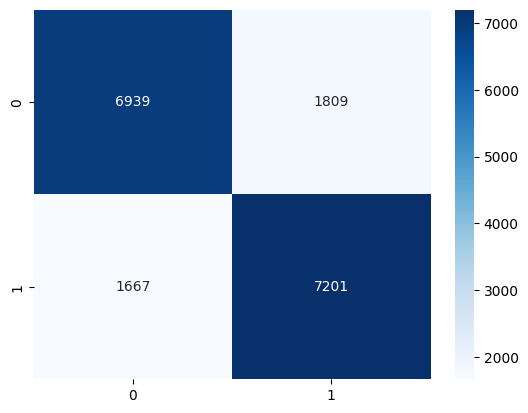


 Training RNN Model...

Epoch 1/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6723 - loss: 0.5894 - val_accuracy: 0.7697 - val_loss: 0.4732
Epoch 2/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7752 - loss: 0.4622 - val_accuracy: 0.7928 - val_loss: 0.4408
Epoch 3/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7887 - loss: 0.4422 - val_accuracy: 0.7969 - val_loss: 0.4330
Epoch 4/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7947 - loss: 0.4312 - val_accuracy: 0.7916 - val_loss: 0.4367
Epoch 5/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8055 - loss: 0.4167 - val_accuracy: 0.8065 - val_loss: 0.4173
Epoch 6/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8076 - loss: 0.4156 - val_accuracy: 0.8202 - val_loss: 0.4004
Epoch 7/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8144 - loss: 0.4049 - val_accuracy: 0.8102 - val_loss: 0.4104
Epoch 8/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy:

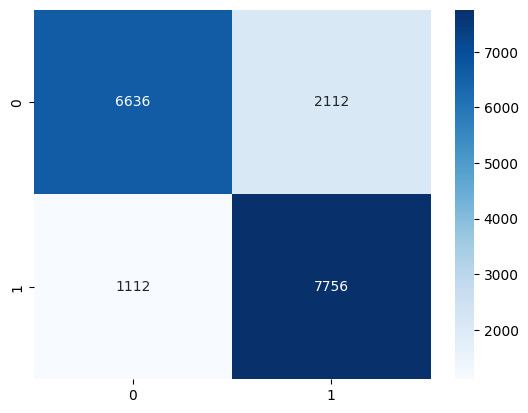


 Training Hybrid CNN-LSTM Model...

Epoch 1/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5948 - loss: 0.6425 - val_accuracy: 0.7228 - val_loss: 0.5312
Epoch 2/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7537 - loss: 0.4984 - val_accuracy: 0.7750 - val_loss: 0.4587
Epoch 3/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7775 - loss: 0.4563 - val_accuracy: 0.7927 - val_loss: 0.4383
Epoch 4/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7820 - loss: 0.4477 - val_accuracy: 0.7933 - val_loss: 0.4397
Epoch 5/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7931 - loss: 0.4359 - val_accuracy: 0.8034 - val_loss: 0.4199
Epoch 6/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7969 - loss: 0.4271 - val_accuracy: 0.7981 - val_loss: 0.4288
Epoch 7/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8032 - loss: 0.4169 - val_accuracy: 0.8100 - val_loss: 0.4091
Epoch 8/10
2202/2202 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/ste

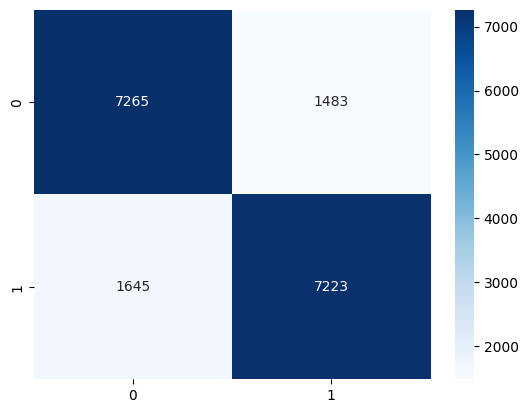


 Best Model: Hybrid CNN-LSTM with Accuracy: 0.8224


In [55]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, LSTM, SimpleRNN, Dropout
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# ---- Load Data ---- #
#data = pd.read_csv("T1.csv")  # Change to your dataset

# Select features and target
X = data[['Month', 'Hour', 'Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']]
y = data['Failure Condition']  # Ensure this is categorical

# Encode labels if classification
encoder = LabelEncoder()
y = encoder.fit_transform(y)  # Converts categorical labels to numbers

# Train-test split
X_train, X_test, y_train, y_test  = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for deep learning models
X_train_cnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_cnn = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

X_train_lstm = X_train.reshape(X_train.shape[0], 5, 1)
X_test_lstm = X_test.reshape(X_test.shape[0], 5, 1)

# ---- Model Definitions ---- #
models = {}

# --- MLP Model --- #
mlp = Sequential([
    Dense(64, activation='relu', input_shape=(5,)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])
mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
models["MLP"] = mlp

# --- CNN Model --- #
cnn = Sequential([
    Conv1D(filters=32, kernel_size=1, activation='relu', input_shape=(1, 5)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
models["CNN"] = cnn

# --- LSTM Model --- #
lstm = Sequential([
    LSTM(50, activation='relu', input_shape=(5, 1), return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
models["LSTM"] = lstm

# --- RNN Model --- #
rnn = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(5, 1), return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
models["RNN"] = rnn

# --- Hybrid CNN-LSTM Model --- #
hybrid = Sequential([
    Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(5, 1)),  # CNN Feature Extractor
    LSTM(50, activation='relu', return_sequences=False),  # LSTM for sequence learning
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
hybrid.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
models["Hybrid CNN-LSTM"] = hybrid

# ---- Train and Evaluate Models ---- #
history = {}
accuracy_scores = {}

for model_name, model in models.items():
    print(f"\n Training {model_name} Model...\n")
    X_train_data = X_train if model_name == "MLP" else X_train_cnn if model_name == "CNN" else X_train_lstm
    X_test_data = X_test if model_name == "MLP" else X_test_cnn if model_name == "CNN" else X_test_lstm

    model.fit(X_train_data, y_train, epochs=10, batch_size=32, validation_data=(X_test_data, y_test), verbose=1)

    # Evaluate
    y_pred = (model.predict(X_test_data) > 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = acc

    print(f"\n {model_name} Accuracy: {acc:.4f}")
    print(f"\n Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"\n  Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.show()

# ---- Select Best Model ---- #
best_model_name = max(accuracy_scores, key=accuracy_scores.get)
best_model = models[best_model_name]
print(f"\n Best Model: {best_model_name} with Accuracy: {accuracy_scores[best_model_name]:.4f}")


 Hybrid CNN-LSTM Accuracy: 0.8224

 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      8748
           1       0.83      0.81      0.82      8868

    accuracy                           0.82     17616
   macro avg       0.82      0.82      0.82     17616
weighted avg       0.82      0.82      0.82     17616



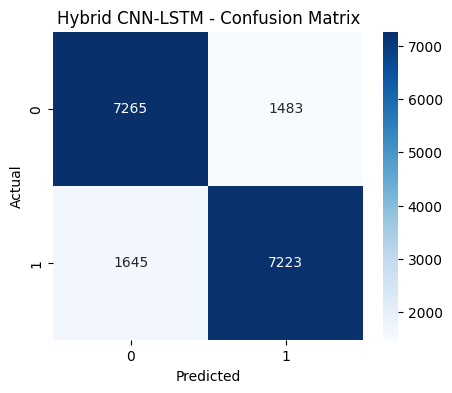

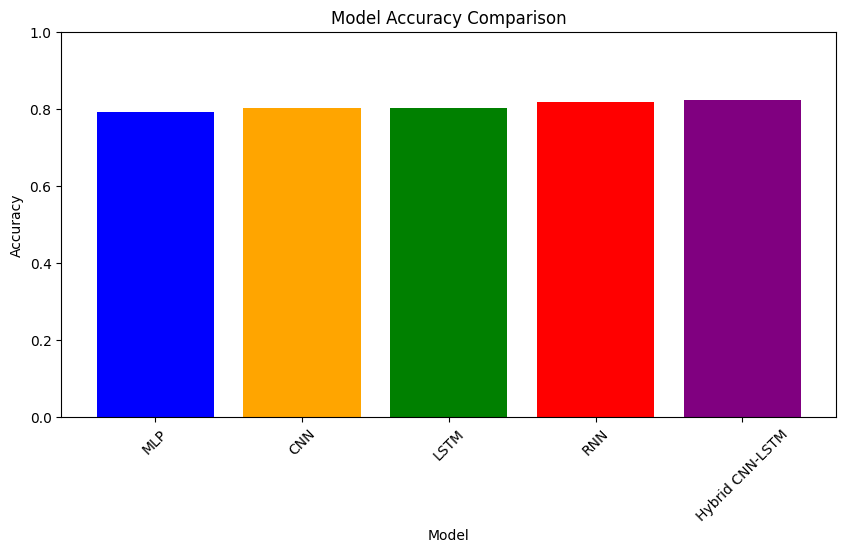

In [56]:
 # Display results
print(f"\n {model_name} Accuracy: {acc:.4f}")
print(f"\n Classification Report:\n{classification_report(y_test, y_pred)}")

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title(f"{model_name} - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ---- Plot Accuracy Scores ---- #
plt.figure(figsize=(10, 5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.show()

In [57]:
# ---- Load New Test Data & Predict ---- #
new_test_data = pd.read_csv("new_test_data.csv")
# Select only the features used during training
features = ['Month', 'Hour', 'Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']
new_test_data_for_prediction = new_test_data[features]

# Scale the new test data using only the relevant features
new_test_data_scaled = scaler.transform(new_test_data_for_prediction)

# Reshape for the best model (if necessary)
if best_model_name in ["CNN"]:
    new_test_data_scaled = new_test_data_scaled.reshape(new_test_data_scaled.shape[0], 1, new_test_data_scaled.shape[1])
elif best_model_name in ["LSTM", "RNN", "Hybrid CNN-LSTM"]: # Include 'Hybrid CNN-LSTM' here
    new_test_data_scaled = new_test_data_scaled.reshape(new_test_data_scaled.shape[0], 5, 1) # Reshape to (samples, timesteps, features)

# Make predictions using the best model
new_predictions = (best_model.predict(new_test_data_scaled) > 0.5).astype(int)

# Decode labels if classification
new_predictions = encoder.inverse_transform(new_predictions.flatten())

# Convert new predictions to a DataFrame
new_test_data["Predicted Failure Condition"] = new_predictions  # Add predictions as a new column

# Save combined data
new_test_data.to_csv("combined_predictions.csv", index=False)

print("\n Combined Predictions saved to 'combined_predictions.csv'")
print(new_test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

 Combined Predictions saved to 'combined_predictions.csv'
       Month      Hour  Wind Speed (m/s)  Theoretical_Power_Curve (KWh)  \
0  -1.615578 -1.660864         -0.531476                      -0.786435   
1  -1.615578 -1.660864         -0.446115                      -0.710712   
2  -1.615578 -1.660864         -0.554021                      -0.805023   
3  -1.615578 -1.660864         -0.449071                      -0.713483   
4  -1.615578 -1.660864         -0.468406                      -0.731337   
5  -1.615578 -1.660864         -0.462229                      -0.725684   
6  -1.615578 -1.516659         -0.417528                      -0.683333   
7  -1.615578 -1.516659         -0.532727                      -0.787481   
8  -1.615578  0.502216         -0.902421                      -1.029375   
9  -1.615578  0.646421         -1.070219                      -1.078209   
10 -1.615578  0.646421         -1.031576                      -1.072178   
11 

In [58]:
# Save model
hybrid.save("hybrid_model.h5")

# Save scaler
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

Original RMSE (no noise): 0.16183601406863893
RMSE with noise level 0.05: 0.240699 (Increase: 48.73%)
RMSE with noise level 0.1: 0.258723 (Increase: 59.87%)
RMSE with noise level 0.2: 0.310782 (Increase: 92.03%)
RMSE with noise level 0.3: 0.365590 (Increase: 125.90%)


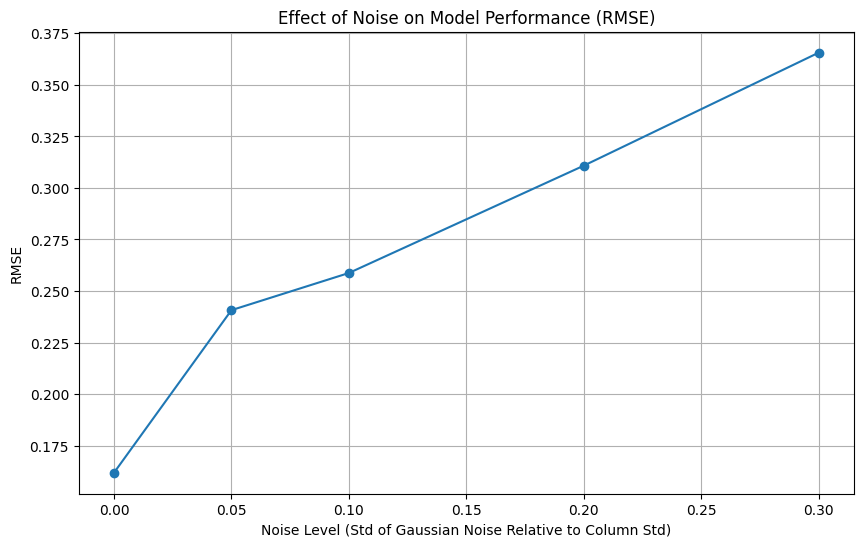

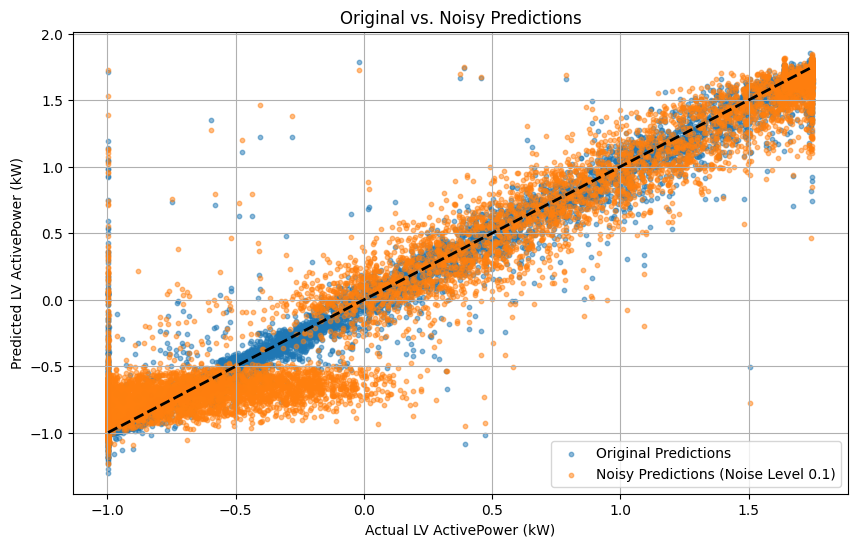

In [50]:
# Function to add Gaussian noise to specified columns
def add_gaussian_noise(df, columns, noise_level=0.1, random_seed=42):
    """
    Add Gaussian noise to specified columns in a DataFrame.
    
    Parameters:
    - df: Input DataFrame
    - columns: List of column names to add noise to
    - noise_level: Standard deviation of Gaussian noise relative to column std
    - random_seed: Seed for reproducibility
    
    Returns:
    - DataFrame with noisy columns
    """
    np.random.seed(random_seed)
    df_noisy = df.copy()
    
    for col in columns:
        std = df_noisy[col].std()  # Standard deviation of the column
        noise = np.random.normal(0, noise_level * std, size=df_noisy.shape[0])
        df_noisy[col] = df_noisy[col] + noise
        # Ensure wind speed and power remain non-negative
        if col in ['Wind Speed (m/s)', 'LV ActivePower (kW)']:
            df_noisy[col] = df_noisy[col].clip(lower=0)
        # Ensure wind direction stays within [0, 360]
        if col == 'Wind Direction (°)':
            df_noisy[col] = df_noisy[col] % 360
            df_noisy[col] = df_noisy[col].clip(lower=0)
    
    return df_noisy

# Define features and target
features = ['Wind Speed (m/s)', 'Wind Direction (°)', 'Month', 'Day', 'Hour']
target = 'LV ActivePower (kW)'

# Split the original (cleaned) dataset
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (original data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the original model (using best parameters from cell 47)
best_params = {
    'subsample': 0.5,
    'min_child_samples': 1,
    'learning_rate': 0.07444444444444444,
    'l2_leaf_reg': 0.01,
    'iterations': 300,
    'depth': 5,
    'colsample_bylevel': 0.9
}
model_original = CatBoostRegressor(**best_params, verbose=False)
model_original.fit(X_train_scaled, y_train)
y_pred_original = model_original.predict(X_test_scaled)
rmse_original = np.sqrt(mean_squared_error(y_test, y_pred_original))

# Define noise levels to test
noise_levels = [0.05, 0.1, 0.2, 0.3]
rmse_noisy = []
noisy_predictions = []

# Add noise and evaluate for each noise level
columns_to_noise = ['Wind Speed (m/s)', 'Wind Direction (°)']
for noise_level in noise_levels:
    # Add noise to the entire dataset
    data_noisy = add_gaussian_noise(data, columns_to_noise, noise_level=noise_level)
    
    # Prepare noisy features
    X_noisy = data_noisy[features]
    X_train_noisy, X_test_noisy, y_train_noisy, y_test_noisy = train_test_split(
        X_noisy, data_noisy[target], test_size=0.2, random_state=42
    )
    
    # Scale noisy features
    X_train_noisy_scaled = scaler.fit_transform(X_train_noisy)
    X_test_noisy_scaled = scaler.transform(X_test_noisy)
    
    # Train model on noisy data
    model_noisy = CatBoostRegressor(**best_params, verbose=False)
    model_noisy.fit(X_train_noisy_scaled, y_train_noisy)
    y_pred_noisy = model_noisy.predict(X_test_noisy_scaled)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test_noisy, y_pred_noisy))
    rmse_noisy.append(rmse)
    noisy_predictions.append(y_pred_noisy)

# Print results
print('Original RMSE (no noise):', rmse_original)
for level, rmse in zip(noise_levels, rmse_noisy):
    print(f'RMSE with noise level {level}: {rmse:.6f} (Increase: {(rmse - rmse_original)/rmse_original*100:.2f}%)')

# Visualize the effect of noise
plt.figure(figsize=(10, 6))
plt.plot([0] + noise_levels, [rmse_original] + rmse_noisy, marker='o')
plt.xlabel('Noise Level (Std of Gaussian Noise Relative to Column Std)')
plt.ylabel('RMSE')
plt.title('Effect of Noise on Model Performance (RMSE)')
plt.grid(True)
plt.show()

# Visualize predictions for one noise level (e.g., 0.1)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_original, alpha=0.5, label='Original Predictions', s=10)
plt.scatter(y_test, noisy_predictions[noise_levels.index(0.1)], alpha=0.5, label='Noisy Predictions (Noise Level 0.1)', s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual LV ActivePower (kW)')
plt.ylabel('Predicted LV ActivePower (kW)')
plt.title('Original vs. Noisy Predictions')
plt.legend()
plt.grid(True)
plt.show()

Overall Standard Deviation of LV ActivePower (kW): 1.00 kW

Standard Deviation of LV ActivePower (kW) by Seasons:
Seasons
Autumn    0.978402
Spring    1.017119
Summer    0.895298
Winter    1.075579
Name: LV ActivePower (kW), dtype: float64

Standard Deviation of LV ActivePower (kW) by Hour:
Hour
-1.661247    1.030014
-1.517016    1.019969
-1.372786    1.033142
-1.228555    1.032023
-1.084325    1.037976
-0.940094    1.016505
-0.795864    1.003084
-0.651633    0.994474
-0.507403    0.958250
-0.363172    0.946723
-0.218942    0.923757
-0.074711    0.913297
 0.069519    0.905569
 0.213750    0.938973
 0.357980    0.942289
 0.502211    0.950908
 0.646441    0.961791
 0.790672    0.973764
 0.934902    1.008954
 1.079133    1.027819
 1.223363    1.041685
 1.367594    1.046126
 1.511824    1.059526
 1.656055    1.053374
Name: LV ActivePower (kW), dtype: float64


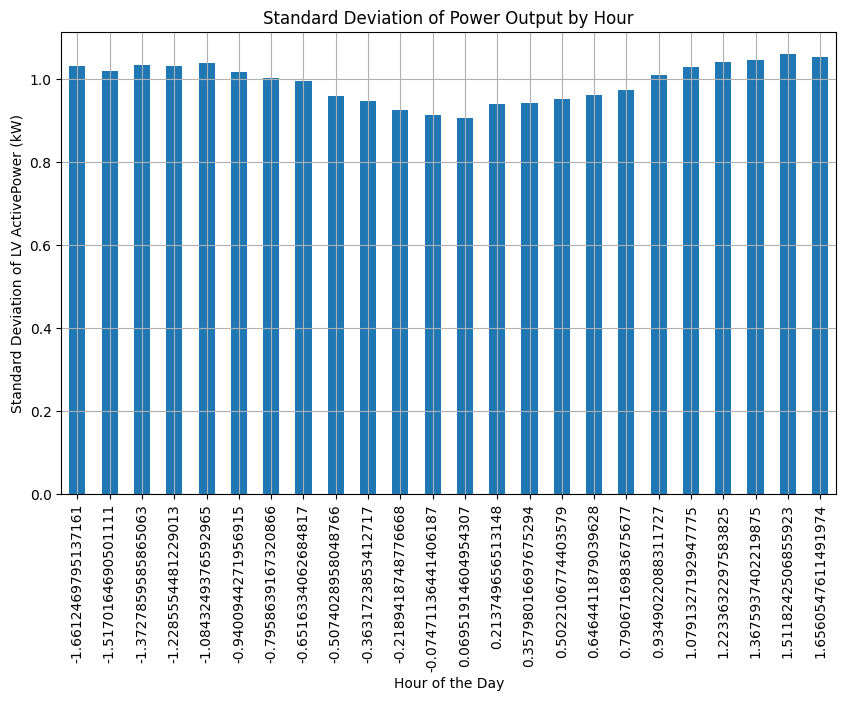

In [51]:
# Calculate the overall standard deviation of LV ActivePower (kW)
overall_std = data['LV ActivePower (kW)'].std()

# Calculate standard deviation grouped by Seasons
std_by_seasons = data.groupby('Seasons')['LV ActivePower (kW)'].std()

# Calculate standard deviation grouped by Hour
std_by_hour = data.groupby('Hour')['LV ActivePower (kW)'].std()

# Print results
print(f"Overall Standard Deviation of LV ActivePower (kW): {overall_std:.2f} kW")
print("\nStandard Deviation of LV ActivePower (kW) by Seasons:")
print(std_by_seasons)
print("\nStandard Deviation of LV ActivePower (kW) by Hour:")
print(std_by_hour)

# Optional: Visualize standard deviation by Hour
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
std_by_hour.plot(kind='bar')
plt.xlabel('Hour of the Day')
plt.ylabel('Standard Deviation of LV ActivePower (kW)')
plt.title('Standard Deviation of Power Output by Hour')
plt.grid(True)
plt.show()